In [1]:
import os
import numpy as np
from keras.preprocessing import image
from keras.models import model_from_json
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)
from fit_on_batches import fit_on_batches
from UNet import UNet

Using CNTK backend


In [2]:
def imgInPath(path, size=None):
    return image.img_to_array(image.load_img(path, target_size=size))
def maskInPath(path, size=None):
    return image.img_to_array(image.load_img(path, target_size=size, color_mode = "grayscale"))

def devide(paths, part, total, mode, size):
    func = imgInPath if mode==0 else maskInPath
    return np.array([func(i, size)/255 for i in paths[len(paths)//total*(part-1):len(paths)//total*part]])

imgPath = 'DATA/Stored/train/'
maskPath = 'DATA/Stored/train_masks/'
#DIM = (1280, 1920, 3)
DIM = (128, 128, 3)

imgPaths = [imgPath+i for i in os.listdir(imgPath)]
maskPaths = [maskPath+i for i in os.listdir(maskPath)]
print('Total {} samples'.format(len(imgPaths)))

Total 10176 samples


In [3]:
# Define IoU metric and loss
def dice_coef(y_true, y_pred, smooth=1.):
    from keras import backend as K
    y_true_f = K.batch_flatten(y_true)
    y_pred_f = K.batch_flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [4]:
# Create model
model = UNet(DIM, start_ch=8)
model.compile('adam', dice_loss, [dice_coef])
print('Total params - {:,}'.format(model.count_params()))
hystory = {}
epochs = 20
batch_size = 64

Total params - 485,817


### Training | Part 1 of 4

In [ ]:
# Training | Part 1 of 4
x_train = devide(imgPaths, 1, 4, 0, DIM[:2])
y_train = devide(maskPaths, 1, 4, 1, DIM[:2])
locHystory = fit_on_batches(model=model, x_data=x_train, y_data=y_train, mode='arr', target_img_size=DIM[:2],
                         epochs=epochs, batch_size=batch_size, patience = None, verbose = 0)
hystory = {k: (hystory.get(k, 0) if k in set(hystory) else []) + locHystory.get(k, 0) for k in set(hystory) | set(locHystory) if k!='BE'}

# Model info
for i in list(range(len(hystory)))[(2 if 'BE' in set(hystory) else 1)::2]:
    key = list(hystory.keys())[i]
    plt.plot(hystory[key], label=key)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Saving model
model_json = model.to_json()
json_file = open("Models/UNetModel.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("Models/UNetModel.h5")

### Training | Part 2 of 4

In [ ]:
# Loading model
json_file = open("Models/UNetModel.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("Models/UNetModel.h5")
model.compile('adam', dice_loss, [dice_coef])

# Training | Part 2 of 4
x_train = None
y_train = None
x_train = devide(imgPaths, 2, 4, 0, DIM[:2])
y_train = devide(maskPaths, 2, 4, 1, DIM[:2])
locHystory = fit_on_batches(model=model, x_data=x_train, y_data=y_train, mode='arr', target_img_size=DIM[:2],
                         epochs=epochs, batch_size=batch_size, patience = None, verbose = 0)
hystory = {k: (hystory.get(k, 0) if k in set(hystory) else []) + locHystory.get(k, 0) for k in set(hystory) | set(locHystory) if k!='BE'}

# Model info
for i in list(range(len(hystory)))[(2 if 'BE' in set(hystory) else 1)::2]:
    key = list(hystory.keys())[i]
    plt.plot(hystory[key], label=key)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Saving model
model_json = model.to_json()
json_file = open("Models/UNetModel.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("Models/UNetModel.h5")

### Training | Part 3 of 4

In [ ]:
# Loading model
json_file = open("Models/UNetModel.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("Models/UNetModel.h5")
model.compile('adam', dice_loss, [dice_coef])

# Training | Part 3 of 4
x_train = None
y_train = None
x_train = devide(imgPaths, 3, 4, 0, DIM[:2])
y_train = devide(maskPaths, 3, 4, 1, DIM[:2])
locHystory = fit_on_batches(model=model, x_data=x_train, y_data=y_train, mode='arr', target_img_size=DIM[:2],
                         epochs=epochs, batch_size=batch_size, patience = None, verbose = 0)
hystory = {k: (hystory.get(k, 0) if k in set(hystory) else []) + locHystory.get(k, 0) for k in set(hystory) | set(locHystory) if k!='BE'}

# Model info
for i in list(range(len(hystory)))[(2 if 'BE' in set(hystory) else 1)::2]:
    key = list(hystory.keys())[i]
    plt.plot(hystory[key], label=key)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Saving model
model_json = model.to_json()
json_file = open("Models/UNetModel.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("Models/UNetModel.h5")

### Training | Part 4 of 4

Train on 2544 samples:
 - 4718s  | loss: 0.0150 | dice_coef: 0.9850 


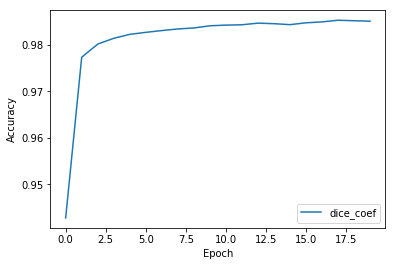

In [5]:
# Loading model
json_file = open("Models/UNetModel.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("Models/UNetModel.h5")
model.compile('adam', dice_loss, [dice_coef])

# Training | Part 4 of 4
x_train = None
y_train = None
x_train = devide(imgPaths, 4, 4, 0, DIM[:2])
y_train = devide(maskPaths, 4, 4, 1, DIM[:2])
locHystory = fit_on_batches(model=model, x_data=x_train, y_data=y_train, mode='arr', target_img_size=DIM[:2],
                         epochs=epochs, batch_size=batch_size, patience = None, verbose = 0)
hystory = {k: (hystory.get(k, 0) if k in set(hystory) else []) + locHystory.get(k, 0) for k in set(hystory) | set(locHystory) if k!='BE'}

# Model info
for i in list(range(len(hystory)))[(2 if 'BE' in set(hystory) else 1)::2]:
    key = list(hystory.keys())[i]
    plt.plot(hystory[key], label=key)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Saving model
model_json = model.to_json()
json_file = open("Models/UNetModel.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("Models/UNetModel.h5")